<a href="https://colab.research.google.com/github/ogut77/estat.me/blob/main/Chapter7_6_2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bagging**

Feature Importance:
 sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.599859
petal width (cm)     0.400141
dtype: float64
Number of trees: 10


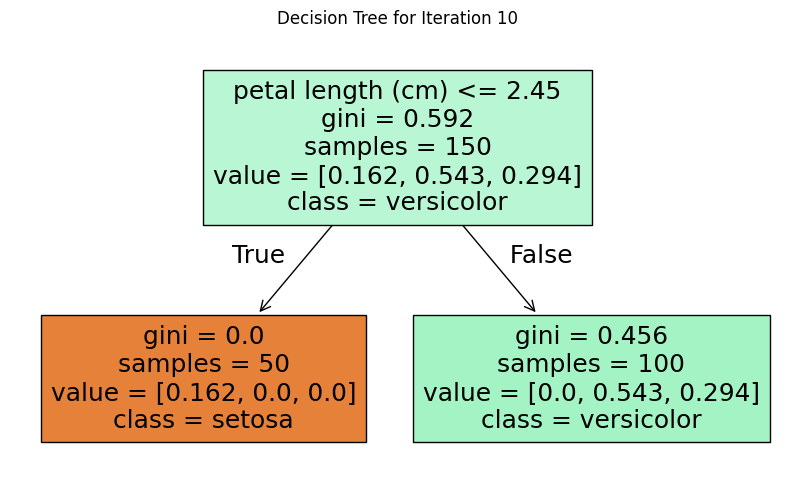

Confusion Matrix:
             setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          47          3
virginica        0           2         48
Misclassification Error: 0.033333333333333326
Misclassification Error (%): 3.3333333333333326 %


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Species'] = iris_df['Species'].map(species_map)

# Bagging with decision trees (mfinal=10 iterations)
bagging_model = AdaBoostClassifier(n_estimators=10, random_state=0)
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']
bagging_model.fit(X, y)

# Feature importance
importance = bagging_model.feature_importances_
feature_names = iris.feature_names
importance_df = pd.Series(importance, index=feature_names)
print("Feature Importance:\n", importance_df)

# List of trees (equivalent to iris.bagging$trees)
trees = bagging_model.estimators_
print("Number of trees:", len(trees))

# Plot the decision tree for the 10th iteration
plt.figure(figsize=(10, 6))
plot_tree(trees[9], feature_names=feature_names, class_names=list(species_map.values()), filled=True)
plt.title("Decision Tree for Iteration 10")
plt.show()

# Predict on the iris dataset
bagging_pred = bagging_model.predict(X)

# Confusion matrix
conf_matrix = confusion_matrix(y, bagging_pred, labels=['setosa', 'versicolor', 'virginica'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['setosa', 'versicolor', 'virginica'],
                              columns=['setosa', 'versicolor', 'virginica'])
print("Confusion Matrix:\n", conf_matrix_df)

# Calculate misclassification error
bagging_error = 1 - (np.diag(conf_matrix).sum() / conf_matrix.sum())
print("Misclassification Error:", bagging_error)
print("Misclassification Error (%):", bagging_error * 100, "%")